# Заключения о модели
После проверки предположений о регрессионной модели (предположения L.I.N.E.) мы хотим интерпретировать результаты; исследовать качество и надежность модели.
Для этого мы собираемся:
- проверить линейность модели с использованием [t-теста](##тестирование-линейности-с-помощью-t-теста).
- найти диапазон возможных значений для параметров модели (наклон и пересечение) с использованием [доверительного интервала](##доверительный-интервал).
- найти диапазон возможных значений для $Y$ с использованием [прогностического интервала](##прогностический-интервал).

Мы загружаем необходимые пакеты и данные:


In [6]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

matplotlib.rcParams['figure.figsize'] = (8, 4)
sb.set(font_scale=1.)

import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('data/housing.csv', sep=',')
df.head()

,price,lotsize(m^2),bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,74700,658.4799,3,1,1,1,1,1,0,0,2,1
1,85000,652.4388,3,1,1,1,0,1,0,1,2,1
2,68500,650.5800,3,1,2,1,0,1,0,0,0,0
3,82900,650.5800,3,1,1,1,0,1,0,0,2,1
4,86000,641.2860,3,2,1,1,1,1,0,0,0,1


Как и ранее, мы создаем модель линейной регрессии, которая предсказывает цену дома $Y$ на основе площади участка $X$.

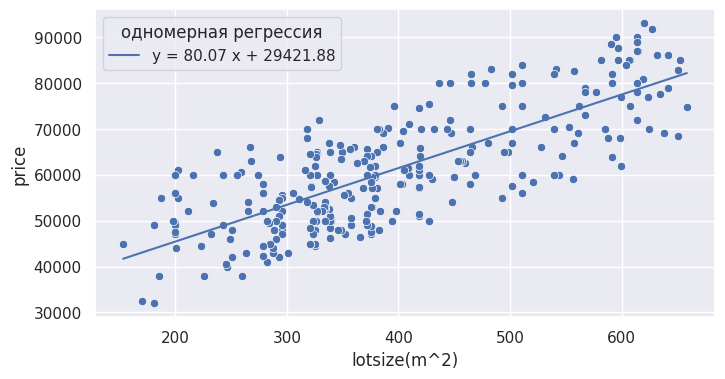

In [8]:
x = df['lotsize(m^2)'].values.reshape(-1, 1)
y = df['price']

# вычислить наклон и пересечение для линии лучшего соответствия (best fit)
model = LinearRegression().fit(x, y)
# предсказать y для каждого x
y_pred = model.predict(x)

intercept = model.intercept_.item()
slope = model.coef_.item()

# построить данные и линию лучшего соответствия (best fit)
sb.scatterplot(data=df, x='lotsize(m^2)', y='price');
plt.plot(x, y_pred, 'b', label=f'y = {slope:.2f} x + {intercept:.2f}')
plt.legend(title='одномерная регрессия')
plt.show()


Ту же самую модель мы создаем, используя пакет `statsmodels`, вместо пакета `scikit-learn`. Преимущество заключается в том, что регрессионная модель из пакета `statsmodels` предоставляет дополнительные статистические значения и тесты, которые нам будут нужны далее.

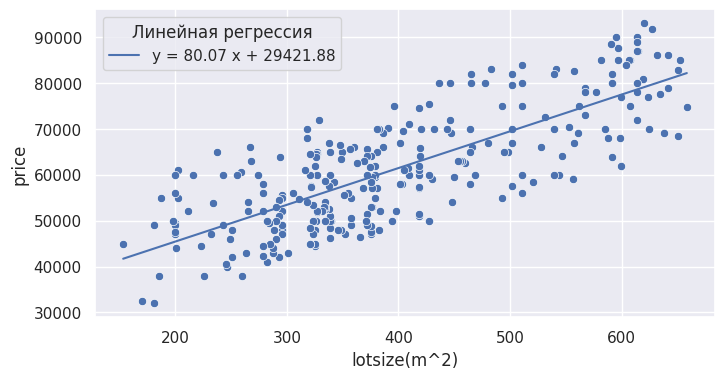

In [9]:
# Тот же код, но с использованием statsmodels вместо scikit-learn
x = df['lotsize(m^2)']
y = df['price']

x_with_const = sm.add_constant(x)
model = sm.OLS(y, x_with_const).fit()
y_pred = model.predict(x_with_const)

intercept, slope = model.params

# построить график данных и линии наилучшего соответствия
sb.scatterplot(data=df, x='lotsize(m^2)', y='price')
plt.plot(x, y_pred, 'b', label=f'y = {slope:.2f} x + {intercept:.2f}')
plt.legend(title='Линейная регрессия')
plt.show()


## Тестирование линейности с использованием t-теста
Линейность - предположение верно, когда отношение между $X$ и $Y$ является линейным ✅.
Это предположение мы проверяли визуально с использованием графиков.
Другой способ проверки - использование статистических тестов, конкретно **t-теста** (аналогично тому, как мы проверяли другие предположения L.I.N.E. с использованием статистических тестов).

t-тест проверяет, существует ли линейная связь между $X$ и $Y$.
Гипотеза гласит (тест предполагает), что: **нет** линейной связи между $X$ и $Y$, то есть $a=0$ в уравнении $y = ax + b$.

Эту гипотезу проверяем с использованием **t-значения** из t-распределения:

- Если t-значение необычно (t-значение далеко от 0), мы отклоняем гипотезу и заключаем, что связь между $X$ и $Y$ **является** линейной ✅.
- Если t-значение близко к нулю, мы не можем отклонить гипотезу. *Примечание: если t-значение близко к нулю, это не означает, что связь является нелинейной; мы не знаем, линейна она или нет.*

Пример t-значения и t-распределения:


#### TODO описание работы t-теста

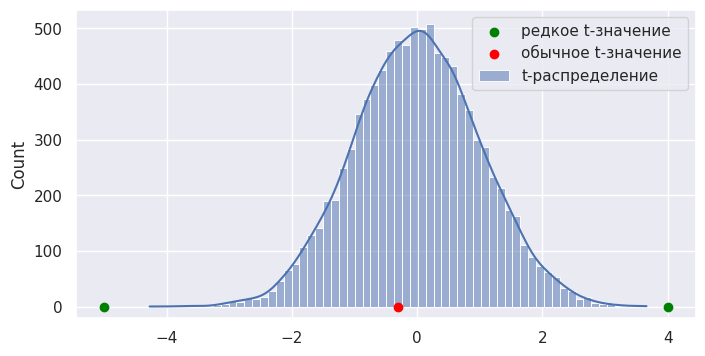

In [10]:
def plot_t_dist():
    '''Выборка значений из t-распределения и построение гистограммы для простой линейной регрессии.'''
    np.random.seed(42)
    degrees_of_freedom = len(y) - 2  # так как у нас 2 параметра, a и b
    data = np.random.standard_t(degrees_of_freedom, size=10000)
    sb.histplot(data, kde=True, label='t-распределение')

# построить t-распределение
plot_t_dist()

# примеры t-значений
plt.scatter([4, -5], [0, 0], label='редкое t-значение', c='green')
plt.scatter(-0.3, 0, label=f'обычное t-значение', c='red')
plt.ylim(-20)
plt.legend()
plt.show()


Мы заинтересованы в конкретном значении t-статистики для нашей регрессионной модели. Мы не вычисляем t-статистику вручную, а используем `statsmodels`, который автоматически рассчитывает t-статистику.
Строим t-распределение и конкретное значение t-статистики для площади участка (получаем из пакета `statsmodels`).
Смотрим на график, насколько часто встречается конкретное значение t-статистики для площади участка.

*В альтернативе, значение t-статистики можно прочитать, вызвав метод `summary()` у модели (обозначено `t`).*


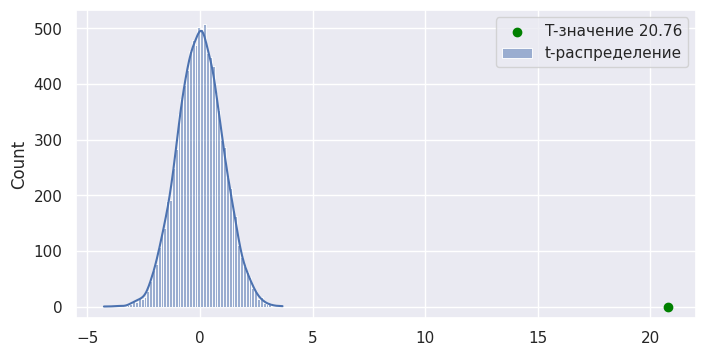

const           18.288461
lotsize(m^2)    20.764489
dtype: float64


In [11]:
plot_t_dist()  # построить t-распределение
t_value = model.tvalues[1]  # T-значение
plt.scatter(t_value, 0, label=f'T-значение {t_value:.2f}', c='green')  # построить T-значение

plt.ylim(-20)
plt.legend()
plt.show()

print(model.tvalues)

Напомним, гипотеза предполагает, что **нет** линейной связи между $X$ и $Y$. Если t-значение необычно, гипотеза не выполняется => заключаем, что связь линейна.

Поскольку конкретное t-значение (20.76) необычно, гипотеза не выполняется => есть линейная связь между $X$ и $Y$ ✅.

### P-значение
Вместо t-значения линейность можно проверить, используя p-значение.
P-значение - это вероятность того, что мы получим конкретное t-значение (20.76) или еще более необычное из t-распределения (например, 28, 50, -50, 123,...).
Если p-значение мало, то t-значение необычно, и связь между $X$ и $Y$ линейна.

**Что считается *малым* p-значением?**

Обычно в качестве порога берется значение $\alpha = 0.05 = 5\%$ (уровень значимости).
Если конкретное `p-значение ≤ 0.05`, тогда гипотеза не выполняется => мы уверены на 95%, что связь линейна ✅.

Посмотрите в выводе метода `summary()`, каково конкретное значение p-значения (обозначено как `P>|t|`). Мы видим, что оно мало, близко к 0.

Конкретное число для p-значения:


In [12]:
alpha = 0.05  # уровень значимости
p_value = model.pvalues[1]  # p-значение
print(p_value)

if p_value < alpha:
    print('Связь является линейной')
else:
    print('Связь может быть нелинейной, а может быть линейной')


1.798965885933811e-58
Связь является линейной


Мы видим, что p-значение чрезвычайно мало, далеко ниже порога `alpha`, поэтому мы показали, что линейность присутствует ✅.

Мы расширяем функцию (из предыдущих упражнений), которая проверяет линейность, добавляя t-тест.
Теперь нам уже не нужно рисовать график для проверки линейности связи, мы проверяем линейность с использованием t-теста.

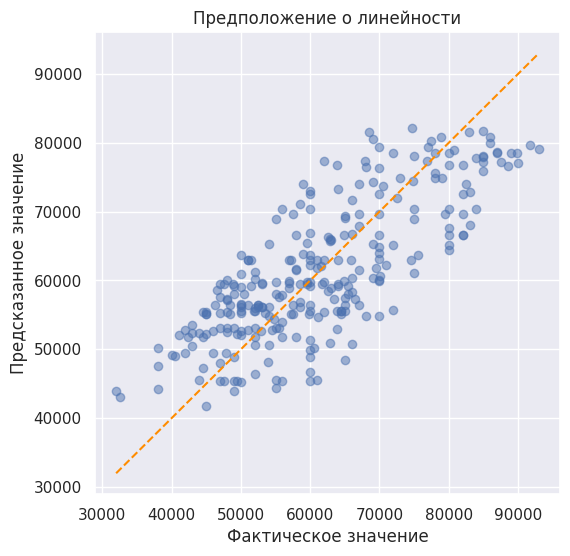

Связь является линейной
1.798965885933811e-58


In [13]:
def linear_assumption(model, features, labels, p_value_thresh=0.05, plot=True):
    '''
    Предположение о линейности: предполагает линейную связь между независимой и зависимой переменными.
    Проверка линейности с использованием t-теста.

    Интерпретация `p-значения`:
    - `p-значение >= порог_значимости` указывает на линейность между `X` и `Y`.
    - `p-значение < порог_значимости` не указывает на линейность.

    Возвращает (только если модель из `statsmodels`, а не из `scikit-learn`):
    - is_linearity_found: Булево значение, указывающее, поддерживается ли предположение о линейности данными.
    - p_value: P-значение, полученное из теста на линейность.
    '''
    y_pred = model.predict(features)

    if plot:
        plt.figure(figsize=(6, 6))
        plt.scatter(labels, y_pred, alpha=.5)
        # x = y line
        line_coords = np.linspace(np.concatenate([labels, y_pred]).min(), np.concatenate([labels, y_pred]).max())
        plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')
        plt.title('Предположение о линейности')
        plt.xlabel('Фактическое значение')
        plt.ylabel('Предсказанное значение')
        plt.show()

    p_value = model.pvalues[1]
    is_linearity_found = True if p_value < p_value_thresh else False
    return is_linearity_found, p_value

x = df['lotsize(m^2)']
y = df['price']

x_with_const = sm.add_constant(x)
model = sm.OLS(y, x_with_const).fit()
is_linearity_found, p_value = linear_assumption(model, x_with_const, y, plot=True)

if is_linearity_found: print('Связь является линейной')
else: print('Связь может быть нелинейной, а может быть линейной')
print(p_value)


## Интервал доверия

<img style="float:right; max-width:400px" src="imgs/conf_int.png" width="60%" />

Набор данных, с которым мы работаем, содержит информацию о 280 домах в городе Уиндзор. Мы используем линейную модель $y = ax + b$ для оценки реальных стоимостей домов. Важно отметить, что у нас нет данных о ценах на все дома в этом городе, а только о определенном их количестве. В реальном мире это обычное явление, и мы редко имеем доступ ко всем данным, а только к определенному числу.

Если бы у нас были другие данные, мы получили бы другую модель с другими значениями наклона и пересечения. Возникает вопрос: насколько бы изменялись параметры модели, если бы мы расширили набор данных? Насколько хороша текущая модель?
Чтобы на это ответить, нам нужна *уверенность*, которую мы называем интервалом доверия.

Интервал доверия (англ. *confidence interval*) - это диапазон, в котором находится реальное значение параметров. Реальные значения параметров мы бы получили, если бы у нас была вся популяция в наборе данных, а не только выборка из популяции. Например, если бы у нас был список всех домов в городе Уиндзор, а не только 280 из них.
Интервал доверия не вычисляется вручную, а рассчитывается автоматически с использованием `statsmodels`, который автоматически рассчитывает интервал.

Интервал доверия создается для определенного процента уверенности, аналогично тому, как мы при [p-значении](###p-значение) брали порог в 95%.
Так и здесь мы хотим с 95% точности определить, между какими значениями находится, например, наклон?

Интервалы доверия получаются вызовом метода `model.conf_int()`, или альтернативно считываются из `model.summary()` (обозначено как `[0.025      0.975]`).


In [14]:
print(model.conf_int())
print('-----------------------------------------------------------------------------------------')
print(model.summary())

                         0             1
const         26254.970257  32588.797778
lotsize(m^2)     72.475833     87.656880
-----------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     431.2
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           1.80e-58
Time:                        01:20:20   Log-Likelihood:                -2912.5
No. Observations:                 280   AIC:                             5829.
Df Residuals:                     278   BIC:                             5836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                       

Толкование предыдущего вывода в консоли: с уверенностью 95% мы утверждаем, что цена дома увеличится на сумму от 72.4$ до 87.6$, когда площадь участка увеличится на $1м^2$.

Визуализируем интервал доверия для наклона:
- синяя линия - предсказанная регрессия (как и прежде).
- зеленая линия - цена дома увеличится минимум на 72.4$, когда площадь участка увеличится на $1м^2$.
- красная линия - цена дома увеличится максимум на 87.6$, когда площадь участка увеличится на $1м^2$.

С уверенностью 95% мы утверждаем, что наклон регрессионной модели находится между зеленой и красной линиями.


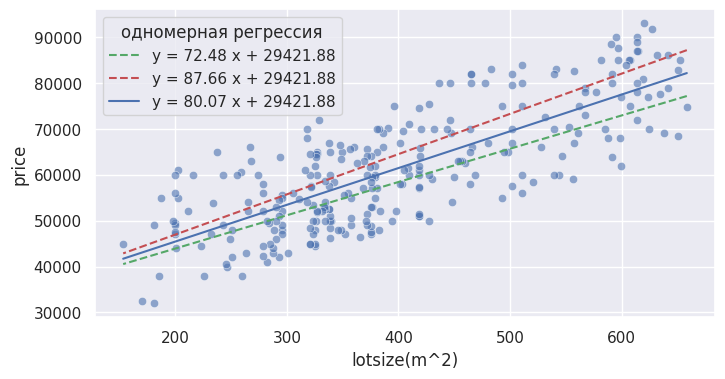

In [15]:
# Индексируем вторую строку в таблице, то есть доверительный интервал для наклона
low_slope, high_slope = model.conf_int(alpha).iloc[1]

y_pred1 = low_slope * x + intercept
y_pred2 = high_slope * x + intercept

plt.plot(x, y_pred1, 'g--', label=f'y = {low_slope:.2f} x + {intercept:.2f}')
plt.plot(x, y_pred2, 'r--', label=f'y = {high_slope:.2f} x + {intercept:.2f}')

# рисуем данные и линию лучшего соответствия (best fit)
sb.scatterplot(data=df, x='lotsize(m^2)', y='price', alpha=0.6)
plt.plot(x, y_pred, 'b', label=f'y = {slope:.2f} x + {intercept:.2f}')
plt.legend(title='одномерная регрессия')
plt.show()

Аналогично наклону, мы можем визуализировать интервал доверия для пересечения (попробуйте сделать это самостоятельно).

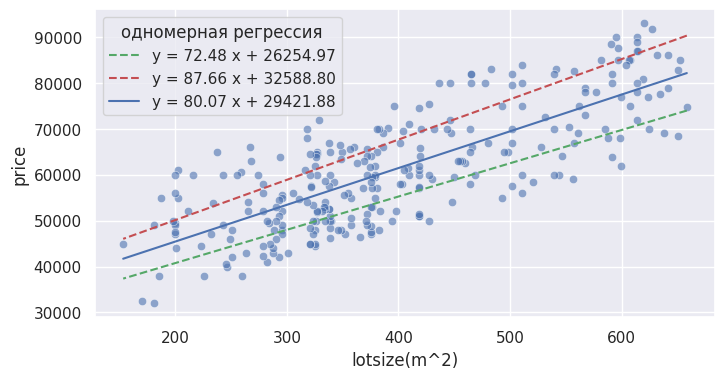

In [20]:
low_slope, high_slope = model.conf_int(alpha).iloc[1]
intercept_low, intercept_high = model.conf_int(alpha).iloc[0]

y_pred1 = low_slope * x + intercept_low
y_pred2 = high_slope * x + intercept_high

plt.plot(x, y_pred1, 'g--', label=f'y = {low_slope:.2f} x + {intercept_low:.2f}')
plt.plot(x, y_pred2, 'r--', label=f'y = {high_slope:.2f} x + {intercept_high:.2f}')

# рисуем данные и линию лучшего соответствия (best fit)
sb.scatterplot(data=df, x='lotsize(m^2)', y='price', alpha=0.6)
plt.plot(x, y_pred, 'b', label=f'y = {slope:.2f} x + {intercept:.2f}')
plt.legend(title='одномерная регрессия')
plt.show()

## Интервал предсказания
До сих пор мы искали доверительные интервалы для параметров (наклон и пересечение).
Мы также можем определить доверительные интервалы для самих предсказаний.

Интервал предсказания отвечает на вопрос - между какими значениями находится $Y_i$ для заданного $X_i$? Например, какой диапазон цен на дома с участком в $450м^2$?

Интервал предсказания получается вызовом метода `model.get_prediction(x_with_const).summary_frame()`.


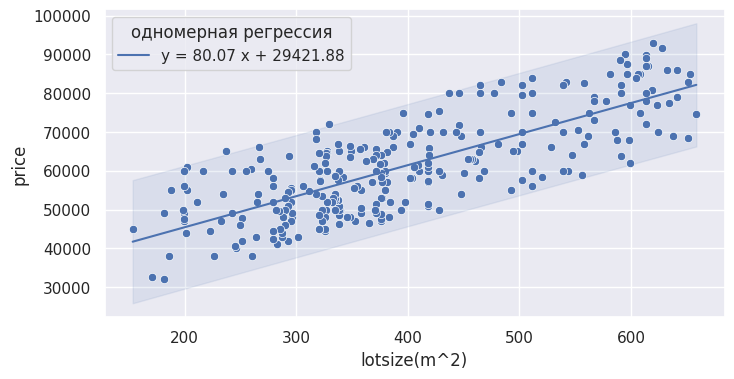

In [21]:
alpha = 0.05 # 95% уровень уверенности
pred_intervals = model.get_prediction(x_with_const).summary_frame(alpha)

# рисуем интервал предсказания
plt.fill_between(df['lotsize(m^2)'],
                 pred_intervals['obs_ci_lower'],
                 pred_intervals['obs_ci_upper'],
                 color='b',
                 alpha=.1)

# рисуем данные и линию лучшего соответствия (best fit)
sb.scatterplot(data=df, x='lotsize(m^2)', y='price')
plt.plot(x, y_pred, 'b', label=f'y = {slope:.2f} x + {intercept:.2f}')
plt.legend(title='одномерная регрессия')
plt.show()

С графика мы видим, в каком диапазоне примерно находится цена дома с участком в $450м^2$ (между 50.000$ и 80.000$). Рассчитаем точный интервал предсказания для участка в $450м^2$ ниже:


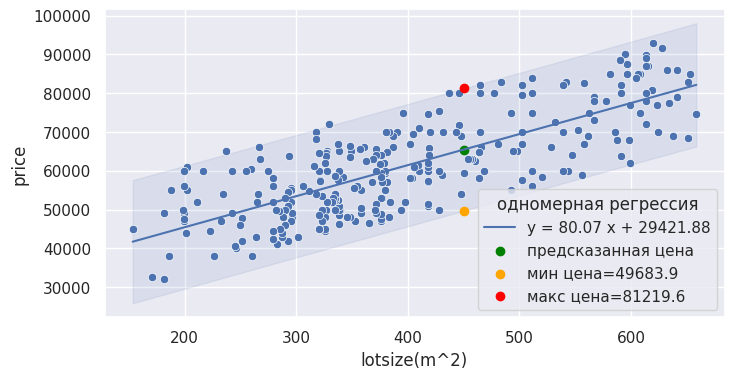

In [18]:
pred_intervals = model.get_prediction(x_with_const).summary_frame(alpha)

# построим интервал предсказания
plt.fill_between(df['lotsize(m^2)'],
                pred_intervals['obs_ci_lower'],
                pred_intervals['obs_ci_upper'],
                color='b',
                alpha=.1)


# рисуем данные и линию лучшего соответствия (best fit)
sb.scatterplot(data=df, x='lotsize(m^2)', y='price')
plt.plot(x, y_pred, 'b', label=f'y = {slope:.2f} x + {intercept:.2f}')

# рассчитаем минимальную и максимальную цену для дома с участком в 450м^2
# определим площадь участка 450м^2 (statsmodels требует такой ввод)
# рассчитаем интервал предсказания для заданного значения 450
lotsize = 450
lotsize_with_const = sm.add_constant([0, lotsize])
pred_intervals = model.get_prediction(lotsize_with_const).summary_frame(alpha)

mean_y_pred = pred_intervals['mean'][1] # средняя предсказанная цена (как и раньше)
low_y_pred = pred_intervals['obs_ci_lower'][1] # минимальная цена согласно интервалу предсказания
high_y_pred = pred_intervals['obs_ci_upper'][1] # максимальная цена согласно интервалу предсказания

# построим интервал предсказания для участка площадью 450м^2
plt.scatter(lotsize, mean_y_pred, c='green', label='предсказанная цена')
plt.scatter(lotsize, low_y_pred, c='orange', label=f'мин цена={low_y_pred:.1f}')
plt.scatter(lotsize, high_y_pred, c='red', label=f'макс цена={high_y_pred:.1f}')

plt.legend(title='одномерная регрессия')
plt.show()


С графика видно, что ожидаемая минимальная цена составляет 49,684$, а максимальная - 81,219$ для дома площадью 450 м². Это утверждается с точностью 95%.

## Задачи
**TODO 1:** Создать регрессионную модель, предсказывающую цену дома на основе площади участка с использованием `statsmodels` и затем:
1. Статистическим тестом проверить, удовлетворяет ли модель линейности.
2. Проверить, удовлетворяет ли модель линейности с уровнем доверия 99%.
3. Нарисовать наихудший и наилучший случаи (верхнюю и нижнюю границу регрессионной линии) с уровнем доверия 99%.
4. Если покупатель хочет купить дом с участком площадью 120 м², рассчитать минимальную сумму, которую ему придется потратить на покупку дома. Нарисовать такой дом на графике. Рассчитать интервал доверия с уровнем доверия 99%.

<!-- 1. Если покупатель планирует потратить от 50,000 $ до 60,000 $, каков диапазон площади участка, который он может купить? Рассчитать стандартный уровень доверия 95%. -->

**TODO 2:** Создать модель линейной регрессии, предсказывающую уровень смертности от рака кожи на основе географической широты с использованием [data/skincancer.csv](data/skincancer.csv) и затем:
1. Найти минимальный и максимальный ожидаемый уровень смертности от рака кожи в Новом Саду. Нарисовать точки на графике. *Координаты Нового Сада: 45.2396° N, 19.8227° E.*
2. Обосновать, являются ли найденные значения валидными.
3. Согласно регрессионной модели, существует ли уровень смертности от рака кожи на Северном полюсе? Обосновать ответ. *Географическая широта Северного полюса: 90° N.*

*Примечание: Если не указано иное, считается, что уровень доверия составляет 95%.*
